In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain

df1 = pd.read_csv('/Users/battemuulen/Documents/GitHub/DataScienceThesis/clean_data_for_experiments/filtered_moral_annotations_MFRC.csv')  # Twitter (MFRC)
df2 = pd.read_csv('/Users/battemuulen/Documents/GitHub/DataScienceThesis/clean_data_for_experiments/filtered_moral_annotations_MFTC.csv')  # Reddit  (MFTC)

def analyze_annotations(df, dataset_name):
    print(f"\n--- EDA for '{dataset_name}' ---")

    raw_counts = df['annotation'].value_counts()
    print("\nTop raw annotation strings:")
    print(raw_counts.head(10))

    split_annotations = df['annotation'].dropna().apply(
        lambda x: [i.strip() for i in x.split(',')]
    )
    flat_annotations = list(chain.from_iterable(split_annotations))
    annotation_counter = Counter(flat_annotations)

    most_common = annotation_counter.most_common(10)
    print("\nTop individual annotation labels:")
    for label, count in most_common:
        print(f"{label}: {count}")

    labels, values = zip(*most_common)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(labels), y=list(values), palette="Set2")
    plt.title(f'Top Annotations in {dataset_name}')
    plt.xlabel('Annotation')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_word_count_histogram(df, dataset_name, bins=50):
    text_col = 'text' if 'text' in df.columns else next(
        (c for c in df.columns if 'text' in c.lower()), None
    )
    word_counts = df[text_col].fillna("").astype(str).str.split().str.len()

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.histplot(word_counts, bins=bins)
    plt.title(f'Word-Count Distribution in {dataset_name}')
    plt.xlabel('Number of Words per Entry')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



--- EDA for 'MFRC (Twitter)' ---

Top raw annotation strings:
Non-Moral            30770
Fairness              4865
Care                  3882
Authority             3111
Loyalty               1198
Care,Fairness         1166
Fairness,Care          580
Care,Authority         464
Care,Loyalty           360
Loyalty,Authority      332
Name: annotation, dtype: int64

Top individual annotation labels:
Non-Moral: 30774
Fairness: 7743
Care: 6858
Authority: 4584
Loyalty: 2587


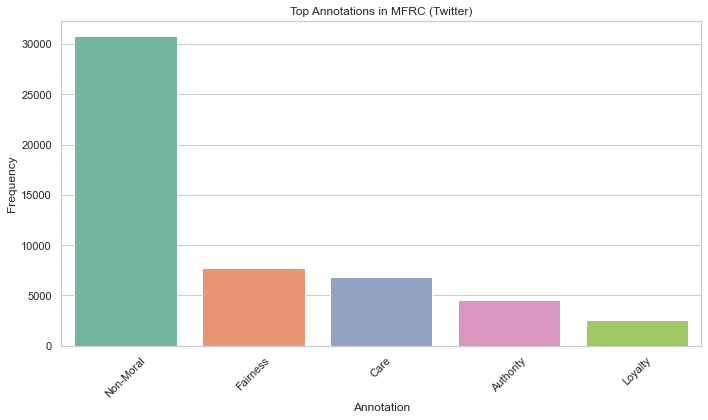

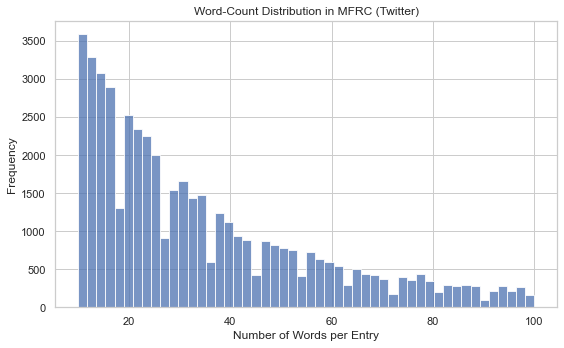

In [14]:
analyze_annotations(df1, "MFRC (Twitter)")
plot_word_count_histogram(df1, "MFRC (Twitter)")


--- EDA for 'MFTC (Reddit)' ---

Top raw annotation strings:
Non-moral             54851
Loyalty                6273
Fairness               6235
Care                   5576
Authority              4766
Care,Fairness          1178
Care,Loyalty            738
Fairness,Authority      400
Loyalty,Authority       328
Fairness,Loyalty        325
Name: annotation, dtype: int64

Top individual annotation labels:
Non-moral: 54865
Fairness: 8645
Care: 8416
Loyalty: 8254
Authority: 6409


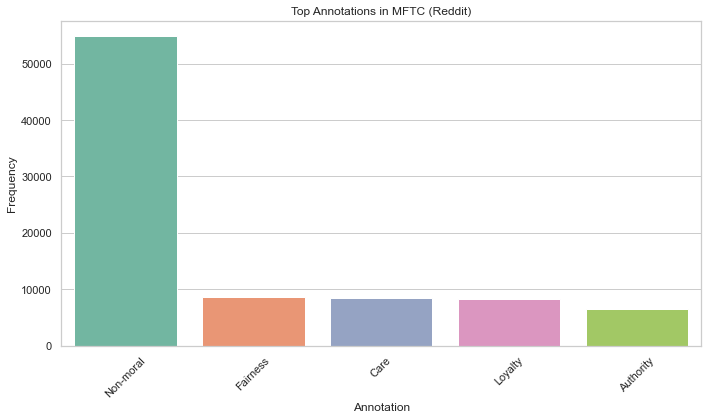

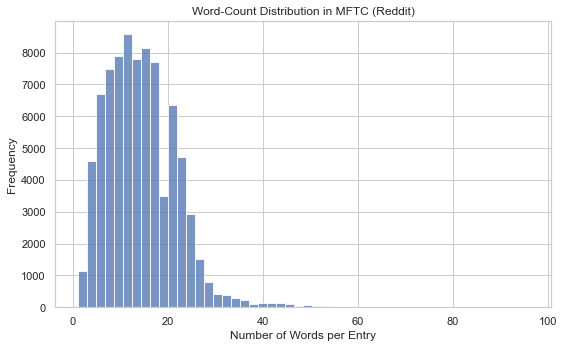

In [15]:
analyze_annotations(df2, "MFTC (Reddit)")
plot_word_count_histogram(df2, "MFTC (Reddit)")